<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 5</b></center>    
<pre>    

# SVR

# Importing the libraries

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# Read World bank CSV

In [10]:
data=pd.read_csv("WorldBank.csv")

In [11]:
data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,India,IND,Export value index (2000 = 100),TX.VAL.MRCH.XD.WD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.147485e+02,7.004085e+02,7.429281e+02,7.614417e+02,6.322694e+02,6.242250e+02,7.061028e+02,7.663608e+02,NaN,NaN
1,India,IND,Insurance and financial services (% of commerc...,TX.VAL.INSF.ZS.WT,NaN,NaN,NaN,NaN,NaN,NaN,...,6.403614e+00,5.246771e+00,5.729495e+00,5.060904e+00,4.706801e+00,4.471147e+00,3.760466e+00,3.921611e+00,3.438072e+00,NaN
2,India,IND,"Merchandise imports by the reporting economy, ...",TM.VAL.MRCH.RS.ZS,4.983551,6.488050e+00,1.012461e+01,9.451370e+00,1.052948e+01,1.089112e+01,...,7.550664e-01,2.738416e-01,4.409538e-01,1.514439e+00,2.228351e+00,2.270593e+00,1.770314e+00,5.354193e-01,NaN,NaN
3,India,IND,Food imports (% of merchandise imports),TM.VAL.FOOD.ZS.UN,NaN,NaN,1.708001e+01,1.519791e+01,1.686304e+01,2.200813e+01,...,3.741041e+00,4.048246e+00,3.895215e+00,4.458509e+00,5.758038e+00,6.505293e+00,6.137617e+00,4.156488e+00,4.248261e+00,NaN
4,India,IND,Share of tariff lines with international peaks...,TM.TAX.MRCH.IP.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.434346e+00,8.641136e+00,8.576307e+00,NaN,5.802677e+00,7.707811e+00,8.288774e+00,9.111423e+00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,India,IND,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,2.002065e+00,1.312934e+00,1.516276e+00,1.695659e+00,2.092116e+00,1.937363e+00,1.506588e+00,1.552336e+00,1.760283e+00,NaN
1436,India,IND,"Net capital account (BoP, current US$)",BN.TRF.KOGT.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.791581e+07,-5.972328e+08,9.618297e+08,-7.433364e+07,3.706943e+07,1.368359e+08,3.731153e+07,-1.231007e+08,-1.155591e+09,NaN
1437,India,IND,"Travel services (% of service imports, BoP)",BM.GSR.TRVL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.761773e+01,1.544257e+01,1.475397e+01,1.799216e+01,1.795378e+01,1.707263e+01,1.686302e+01,1.716750e+01,1.755462e+01,NaN
1438,India,IND,Cereal production (metric tons),AG.PRD.CREL.MT,NaN,8.737650e+07,8.725755e+07,9.037301e+07,9.370600e+07,7.969950e+07,...,2.878600e+08,2.932900e+08,2.949095e+08,2.960100e+08,2.843330e+08,2.978500e+08,3.136100e+08,NaN,NaN,NaN


# Perform conditional selection to find - Population ages 15-64 (% of total population)

In [12]:
data1 = data[data['Indicator Name']=='Population ages 15-64 (% of total population)']
data1

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
9,India,IND,Population ages 15-64 (% of total population),SP.POP.1564.TO.ZS,56.49748,56.177532,55.807455,55.461664,55.248939,55.211351,...,64.429404,64.805519,65.208489,65.59598,65.944164,66.274262,66.538187,66.766743,67.003811,NaN


# Divide the data into input and output

In [24]:
x = np.arange(1960,2020).reshape(-1,1)
y = data1.values[0][4:-1]

# Plot scatter plot of Population ages 15-64 (% of total population)

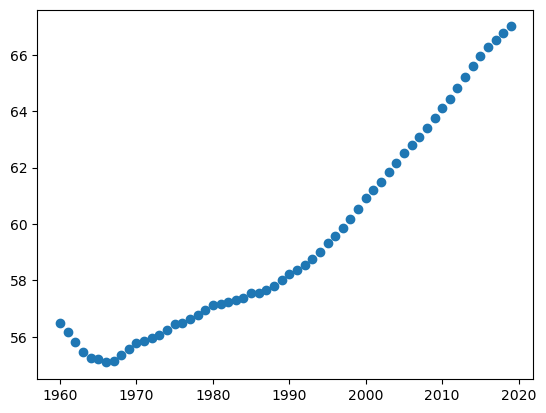

In [25]:
plt.scatter(x,y)
plt.show()

# Splitting the dataset into the Training set and Test set

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=7)

In [29]:
x_test

array([[1991],
       [1980],
       [2019],
       [1977],
       [1970],
       [2004],
       [1994],
       [1975],
       [1981],
       [1990],
       [1997],
       [2005],
       [1972],
       [1973],
       [1987],
       [1978],
       [1992],
       [1961]])

# Fitting SVR on 3 Different Kernel on dataset

In [53]:
model_lin = SVR(kernel='linear')

model_poly = SVR(kernel='poly', C=1.0, epsilon=0.1)

model_rbf = SVR(kernel='rbf')

In [54]:
model_lin.fit(x_train, y_train)

SVR(kernel='linear')

In [55]:
model_poly.fit(x_train, y_train)

SVR(kernel='poly')

In [56]:
model_rbf.fit(x_train, y_train)

SVR()

# Predict the x_test using 3 Kernel

In [57]:
y_predict_lin = model_lin.predict(x)
y_predict_poly = model_poly.predict(x)
y_predict_rbf = model_rbf.predict(x)

# Visualising the  results

In [58]:
y_test

array([58.37403848, 57.1425581, 67.00381119, 56.62068516, 55.78194745,
       62.173897, 59.012126, 56.44405309, 57.18105454, 58.22990246,
       59.8572303, 62.52276485, 55.95268174, 56.07247186, 57.6545119,
       56.78900152, 58.5472698, 56.17753236], dtype=object)

In [59]:
y_predict_lin

array([53.50910347, 53.71343665, 53.91776983, 54.12210301, 54.32643619,
       54.53076937, 54.73510255, 54.93943573, 55.14376892, 55.3481021 ,
       55.55243528, 55.75676846, 55.96110164, 56.16543482, 56.369768  ,
       56.57410119, 56.77843437, 56.98276755, 57.18710073, 57.39143391,
       57.59576709, 57.80010027, 58.00443346, 58.20876664, 58.41309982,
       58.617433  , 58.82176618, 59.02609936, 59.23043254, 59.43476572,
       59.63909891, 59.84343209, 60.04776527, 60.25209845, 60.45643163,
       60.66076482, 60.865098  , 61.06943118, 61.27376436, 61.47809754,
       61.68243072, 61.8867639 , 62.09109708, 62.29543027, 62.49976345,
       62.70409663, 62.90842981, 63.11276299, 63.31709617, 63.52142935,
       63.72576253, 63.93009572, 64.1344289 , 64.33876208, 64.54309526,
       64.74742844, 64.95176162, 65.1560948 , 65.36042799, 65.56476117])

In [60]:
y_predict_poly

array([ -75362.50157507,  -75855.11021765,  -76348.22789343,
        -76841.84874304,  -77335.9734989 ,  -77830.59581335,
        -78325.72545202,  -78821.3563114 ,  -79317.49669226,
        -79814.13975866,  -80311.28038366,  -80808.93394812,
        -81307.09337194,  -81805.75157507,  -82304.92271765,
        -82804.59752234,  -83304.77379187,  -83805.46129187,
        -84306.65367468,  -84808.35899694,  -85310.56676062,
        -85813.28526648,  -86316.50426062,  -86820.23497351,
        -87324.47545202,  -87829.22130163,  -88334.48057898,
        -88840.24742468,  -89346.51915319,  -89853.30357702,
        -90360.6009403 ,  -90868.40465124,  -91376.71959265,
        -91885.54967077,  -92394.88511999,  -92904.73155554,
        -93415.08580359,  -93925.95860632,  -94437.34215124,
        -94949.23741491,  -95461.64464148,  -95974.56456335,
        -96487.99888952,  -97001.93980749,  -97516.40684851,
        -98031.37828405,  -98546.86363562,  -99062.86754187,
        -99579.3797489 ,

In [61]:
y_predict_rbf

array([55.94533846, 55.82416045, 55.72357539, 55.64489258, 55.58896   ,
       55.55613554, 55.54627623, 55.55874625, 55.59244409, 55.64584805,
       55.71707847, 55.8039743 , 55.90418082, 56.0152447 , 56.13471253,
       56.26022835, 56.38962615, 56.52101334, 56.6528418 , 56.78396355,
       56.9136692 , 57.04170755, 57.16828632, 57.29405399, 57.42006433,
       57.54772502, 57.67873312, 57.81499971, 57.9585671 , 58.11152133,
       58.27590324, 58.45362083, 58.64636576, 58.85553617, 59.08216806,
       59.32687682, 59.58981038, 59.87061502, 60.16841471, 60.48180439,
       60.80885759, 61.14714823, 61.4937865 , 61.84546815, 62.19853639,
       62.5490552 , 62.89289252, 63.22581145, 63.54356716, 63.84200704,
       64.11717122, 64.36539054, 64.58337874, 64.76831609, 64.91792137,
       65.03050982, 65.10503485, 65.14111205, 65.13902452, 65.09970939])

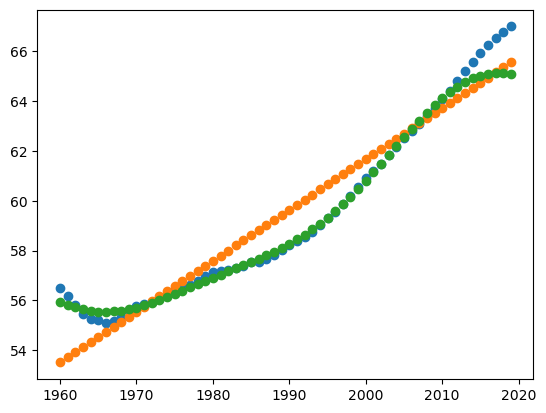

In [69]:
plt.scatter(x,y)
plt.scatter(x,y_predict_lin)
plt.scatter(x,y_predict_rbf)

# Decision Tree Classifier

In [63]:
# Visualising the  resultsfrom sklearn.datasets import load_iris

# Import iris data ser using sklearn

In [72]:
from sklearn.datasets import load_iris

# Importing the libraries

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

# Divide the data into input and output

In [77]:
data = load_iris()

In [78]:
x = data.data

In [79]:
y = data.target

# Splitting the dataset into the Training set and Test set

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=45)
# x_test

# Fitting DecisionTreeClassifier   on dataset

In [88]:
model = DecisionTreeClassifier()

In [89]:
t = model.fit(x_train, y_train)

# Display Decision Tree

[Text(0.3181818181818182, 0.9166666666666666, 'X[2] <= 2.45\ngini = 0.666\nsamples = 105\nvalue = [33, 37, 35]'),
 Text(0.22727272727272727, 0.75, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.4090909090909091, 0.75, 'X[3] <= 1.65\ngini = 0.5\nsamples = 72\nvalue = [0, 37, 35]'),
 Text(0.18181818181818182, 0.5833333333333334, 'X[2] <= 5.35\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6363636363636364, 0.5833333333333334, 'X[3] <= 1.75\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]'),
 Text(0.45454545454545453, 0.4166666666666667, 'X[0] <= 5.8\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5454545454545454, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8181818181818182, 0.41

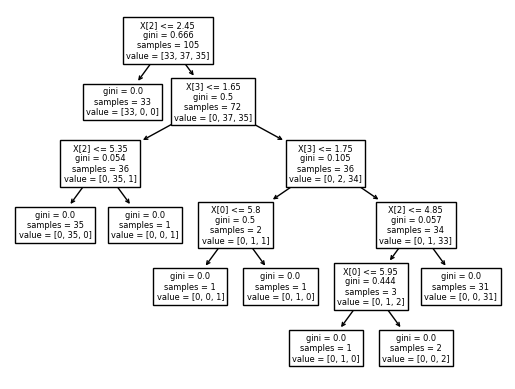

In [90]:
tree.plot_tree(t)

# Predict the x_test 

In [92]:
y_predict = model.predict(x)
